#  Assisting children while biking

### Gruppe 7: Maximilian Hörnis, Florian Schwarm, Dennis Rupprecht

## Motivation 
- Children are active participants in road traffic
- Traffic signs might not be obvious to them
- Handheld technology device (smartphones etc.) usage is prevalent among children 

## Idea

Recognize and classify traffic signs automatically and display them in
an easy to understand assistive technology for children, without distracting them.

## Task


* Create selection from traffic signs
*   Recognize a stop sign



In [ ]:
import os
os.sys.path

In [2]:
# Import some libs
import matplotlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

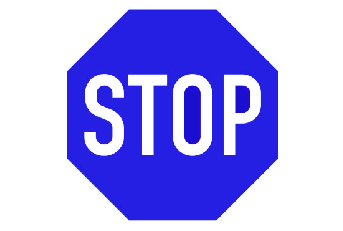

In [3]:
# Show a image
img = cv2.imread("stopsign.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
fig = plt.figure()
plt.axis("off")
plt.imshow(img)

In [ ]:
import cv2
import sys
import numpy as np

def nothing(x):
    pass

# Load in image
image = img

# Create a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('HMin','image',0,179,nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin','image',0,255,nothing)
cv2.createTrackbar('VMin','image',0,255,nothing)
cv2.createTrackbar('HMax','image',0,179,nothing)
cv2.createTrackbar('SMax','image',0,255,nothing)
cv2.createTrackbar('VMax','image',0,255,nothing)

# Set default value for MAX HSV trackbars.
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize to check if HSV min/max value changes
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

output = image
wait_time = 33

while(1):

    # get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin','image')
    sMin = cv2.getTrackbarPos('SMin','image')
    vMin = cv2.getTrackbarPos('VMin','image')

    hMax = cv2.getTrackbarPos('HMax','image')
    sMax = cv2.getTrackbarPos('SMax','image')
    vMax = cv2.getTrackbarPos('VMax','image')

    # Set minimum and max HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Create HSV Image and threshold into a range.
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(image,image, mask= mask)

    # Print if there is a change in HSV value
    if( (phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display output image
    cv2.imshow('image',output)

    # Wait longer to prevent freeze for videos.
    if cv2.waitKey(wait_time) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

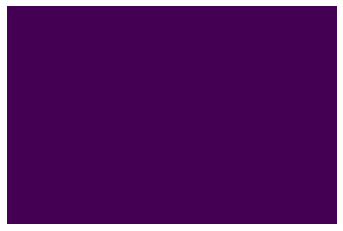

In [7]:
# Define the colors. We are looking for the colors between [224, 27, 34](color img) and [227, 30, 36](color img2)

# lower mask (0-10)
lower_red = np.array([0,113,167])
upper_red = np.array([0,113,167])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([179,255,255])
upper_red = np.array([179,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

output = cv2.imwrite("new.jpg", mask)


# inRange now looking in the picture between the both colors
#mask = cv2.inRange(img, lower, upper)
plt.axis("off")
plt.imshow(mask)

In [9]:
img = cv2.imread("stopsign.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,threshold = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt) 
    # Shortlisting the regions based on there area. 
    if area > 10000:  
        approx = cv2.approxPolyDP(cnt,  
                                  0.009 * cv2.arcLength(cnt, True), True) 
        cv2.drawContours(img, [approx], 0, (0), 5)
        x = approx.ravel()[0]
        y = approx.ravel()[1]
        if len(approx)==8:
            print("stop sign")
            cv2.drawContours(img,[cnt],0,(0,255,0),3)

cv2.imshow(" ",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

stop sign


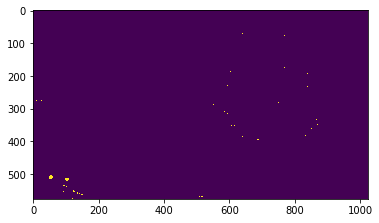

In [10]:
img = cv2.imread("test.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,threshold = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt) 
    # Shortlisting the regions based on there area. 
    if area > 10:  
        approx = cv2.approxPolyDP(cnt,  
                                  0.009 * cv2.arcLength(cnt, True), True) 
        cv2.drawContours(img, [approx], 0, (0), 5)
        x = approx.ravel()[0]
        y = approx.ravel()[1]
        if len(approx)==8:
            print("stop sign")
            cv2.drawContours(img,[cnt],0,(0,255,0),3)
            
plt.imshow(threshold)

#cv2.imshow(" ",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

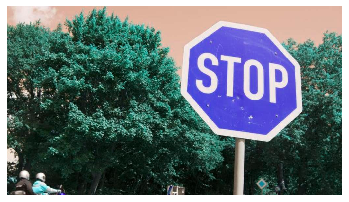

In [11]:
# Show a image
img = cv2.imread("test.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
fig = plt.figure()
plt.axis("off")
plt.imshow(img)

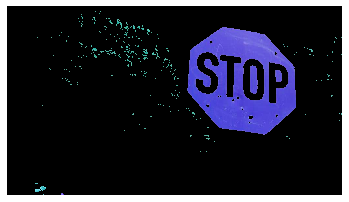

In [12]:
# Define the colors. We are looking for the colors between [224, 27, 34](color img) and [227, 30, 36](color img2)

# lower mask (0-10)
lower_red = np.array([0,113,167])

upper_red = np.array([179,255,255])
mask = cv2.inRange(img_hsv, lower_red, upper_red)


output = cv2.bitwise_and(img, img, mask=mask)
#output = cv2.imwrite("new2.jpg", mask)


# inRange now looking in the picture between the both colors
#mask = cv2.inRange(img, lower, upper)
plt.axis("off")
plt.imshow(output)

In [13]:
img = output
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt) 
    # Shortlisting the regions based on there area. 
    if area > 10000:  
        approx = cv2.approxPolyDP(cnt,  
                                  0.009 * cv2.arcLength(cnt, True), True) 
        cv2.drawContours(img, [approx], 0, (0), 5)
        x = approx.ravel()[0]
        y = approx.ravel()[1]
        if len(approx)==8:
            print("stop sign")
            cv2.drawContours(img,[cnt],0,(0,255,0),3)
            
cv2.imshow(" ",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

stop sign
